In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/Classified Data')

In [ ]:
df.head()

Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0           0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608   
1           1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450   
2           2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781   
3           3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128   
4           4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727   

        FDJ       PJF       HQE       NXJ  TARGET CLASS  
0  0.759697  0.643798  0.879422  1.231409             1  
1  0.675334  1.013546  0.621552  1.492702             0  
2  1.626351  1.154483  0.957877  1.285597             0  
3  1.409708  1.380003  1.522692  1.153093             1  
4  1.115596  0.646691  1.463812  1.419167             1

In [ ]:
df.describe()

Unnamed: 0          WTT          PTI          EQW          SBI  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    499.500000     0.949682     1.114303     0.834127     0.682099   
std     288.819436     0.289635     0.257085     0.291554     0.229645   
min       0.000000     0.174412     0.441398     0.170924     0.045027   
25%     249.750000     0.742358     0.942071     0.615451     0.515010   
50%     499.500000     0.940475     1.118486     0.813264     0.676835   
75%     749.250000     1.163295     1.307904     1.028340     0.834317   
max     999.000000     1.721779     1.833757     1.722725     1.634884   

               LQE          QWG          FDJ          PJF          HQE  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      1.032336     0.943534     0.963422     1.071960     1.158251   
std       0.243413     0.256121     0.255118     0.288982     0.293738   
min       0.315307     0.262389     0.295228     0.299476     0.365157   
25%       0.870855     0.761064     0.784407     0.866306     0.934340   
50%       1.035824     0.941502     0.945333     1.065500     1.165556   
75%       1.198270     1.123060     1.134852     1.283156     1.383173   
max       1.650050     1.666902     1.713342     1.785420     1.885690   

               NXJ  TARGET CLASS  
count  1000.000000    1000.00000  
mean      1.362725       0.50000  
std       0.204225       0.50025  
min       0.639693       0.00000  
25%       1.222623       0.00000  
50%       1.375368       0.50000  
75%       1.504832       1.00000  
max       1.893950       1.00000

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))


In [ ]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0   -1.730320 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375   
1   -1.726856 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706   
2   -1.723391 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156   
3   -1.719927  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220   
4   -1.716463  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773   

        FDJ       PJF       HQE       NXJ  
0 -0.798951 -1.482368 -0.949719 -0.643314  
1 -1.129797 -0.202240 -1.828051  0.636759  
2  2.599818  0.285707 -0.682494 -0.377850  
3  1.750208  1.066491  1.241325 -1.026987  
4  0.596782 -1.472352  1.040772  0.276510

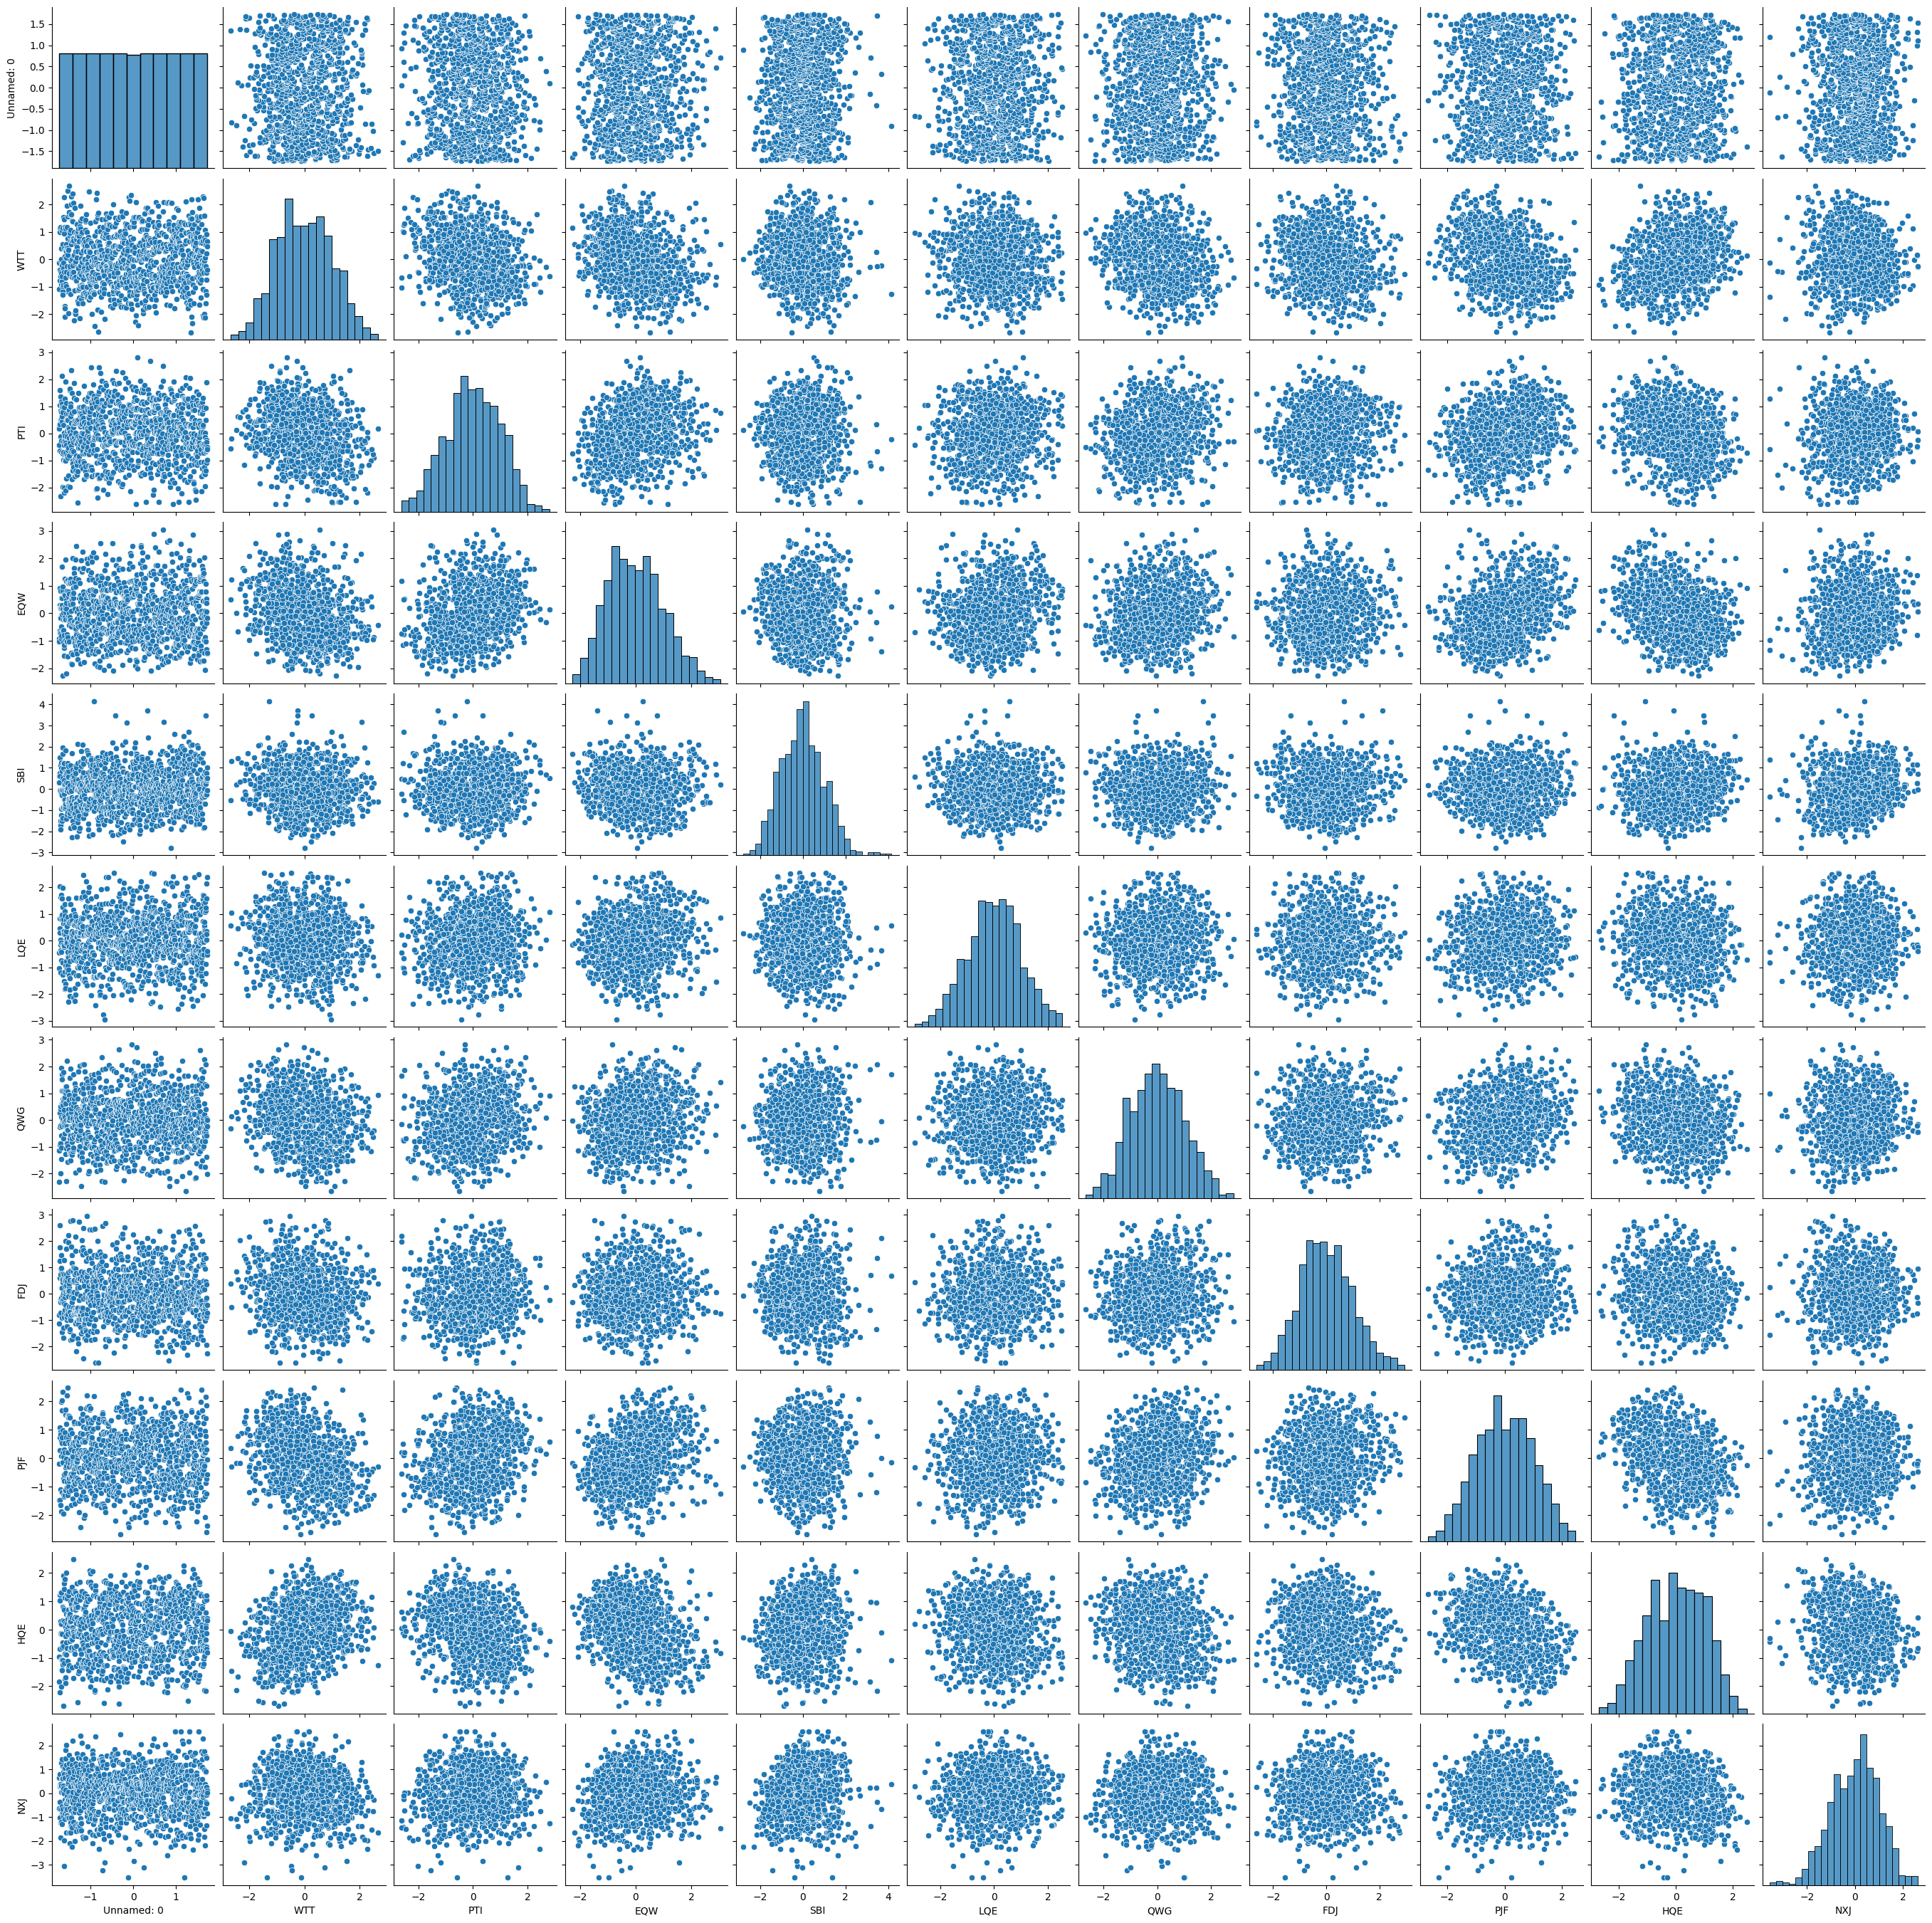

In [26]:
sns.pairplot(df_feat)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

In [ ]:
print(x_train.shape)


(700, 11)


In [ ]:
print(y_train.shape)

(300, 11)


In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn=KNeighborsClassifier(n_neighbors=1)

In [32]:
knn=knn.fit(x_train,y_train)

In [34]:
pred=knn.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[138  18]
 [ 11 133]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       156
           1       0.88      0.92      0.90       144

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [35]:
error_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i=knn.predict(x_test)
  error_rate.append(np.mean(pred_i!=y_test))

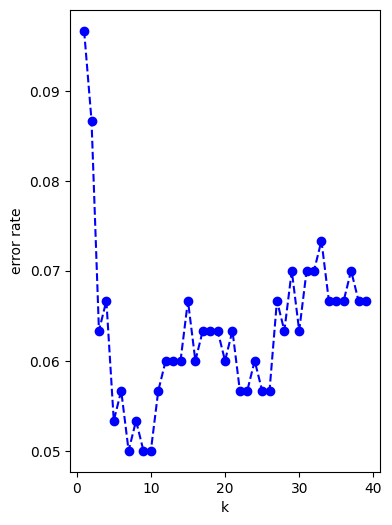

In [37]:
plt.figure(figsize=(4,6))
plt.plot(range(1,40),error_rate,color='blue',marker='o',linestyle='dashed')
plt.xlabel('k')
plt.ylabel('error rate')
plt.show()